# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
current_btc_price = requests.get(btc_url).json()['data']['1']['quotes']['CAD']['price']
# Fetch current ETH price
current_eth_price = requests.get(eth_url).json()['data']['1027']['quotes']['CAD']['price']
# Compute current value of my crpto
my_btc_value = current_btc_price * my_btc
my_eth_value = current_eth_price * my_eth
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $20413.29
The current value of your 5.3 ETH is $2872.78


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2020-10-23", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio

AGG                                       SPY  \
                            open      high    low   close   volume    open   
2020-10-23 00:00:00-04:00  117.3  117.4599  117.3  117.45  1961947  345.93   

                                                               
                             high      low    close    volume  
2020-10-23 00:00:00-04:00  345.99  343.605  344.266  16984828

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio['AGG']['close'])
spy_close_price = float(df_portfolio['SPY']['close'])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.45
Current SPY closing price: $344.266


In [10]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17213.30
The current value of your 200 AGG shares is $23490.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
crypto_amount = my_btc_value + my_eth_value
shares_amount = my_spy_value + my_agg_value
amount_data = {
    "amount" : [crypto_amount,shares_amount]
}

investment_type = ["crypto", "shares"]

df_savings = pd.DataFrame(amount_data, index=investment_type)

# Display savings DataFrame
display(df_savings)

,amount
crypto,23286.064483
shares,40703.300000


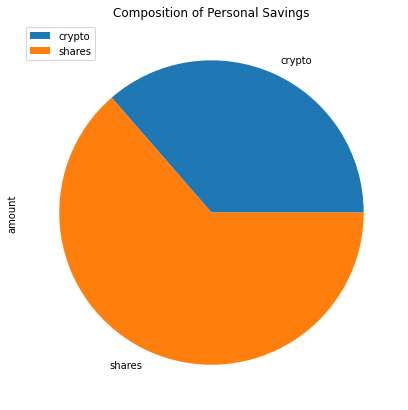

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y='amount', title="Composition of Personal Savings",figsize=(7,7))

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
savings = crypto_amount + shares_amount

# Validate saving health
if savings > emergency_fund:
    print("Congratulating! You have enough money in your emergency fund.")
elif savings == emergency_fund :
    print("Congratulating! You have reached your financial goal")
elif emergency_fund < savings:
    print(f"You are {emergency_fund - savings} from reaching your goal")
else :
    print("Not enough information ")

Congratulating! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-10-23', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-10-23', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_stock_data.head()

AGG                                      SPY  \
                             open    high     low   close   volume    open   
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632  207.25   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981  207.30   
2015-10-27 00:00:00-04:00  110.03  110.03  109.88  109.95  1791888  206.20   
2015-10-28 00:00:00-04:00  109.98  110.05  109.57  109.63  1474796  206.97   
2015-10-29 00:00:00-04:00  109.34  109.42  109.13  109.16  2095003  208.34   

                                                              
                             high     low   close     volume  
2015-10-23 00:00:00-04:00  207.95  206.30  207.51  103135843  
2015-10-26 00:00:00-04:00  207.37  206.56  206.97   51484043  
2015-10-27 00:00:00-04:00  207.00  205.79  206.58   62899344  
2015-10-28 00:00:00-04:00  208.97  206.21  208.96  115482088  
2015-10-29 00:00:00-04:00  209.27  208.21  208.87   64052955

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyears = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
MC_thirtyyears.portfolio_data

AGG                                      \
                             open      high     low    close   volume   
2015-10-23 00:00:00-04:00  109.79  109.7900  109.69  109.740  1344632   
2015-10-26 00:00:00-04:00  109.85  109.9000  109.74  109.790  1385981   
2015-10-27 00:00:00-04:00  110.03  110.0300  109.88  109.950  1791888   
2015-10-28 00:00:00-04:00  109.98  110.0500  109.57  109.630  1474796   
2015-10-29 00:00:00-04:00  109.34  109.4200  109.13  109.160  2095003   
...                           ...       ...     ...      ...      ...   
2020-10-19 00:00:00-04:00  117.81  117.8700  117.72  117.787  4231106   
2020-10-20 00:00:00-04:00  117.70  117.7100  117.58  117.640  3624855   
2020-10-21 00:00:00-04:00  117.59  117.6400  117.48  117.515  2829309   
2020-10-22 00:00:00-04:00  117.51  117.5400  117.30  117.310  3933253   
2020-10-23 00:00:00-04:00  117.30  117.4599  117.30  117.450  1961947   

                                           SPY                            \
                          daily_return    open    high      low    close   
2015-10-23 00:00:00-04:00          NaN  207.25  207.95  206.300  207.510   
2015-10-26 00:00:00-04:00     0.000456  207.30  207.37  206.560  206.970   
2015-10-27 00:00:00-04:00     0.001457  206.20  207.00  205.790  206.580   
2015-10-28 00:00:00-04:00    -0.002910  206.97  208.97  206.210  208.960   
2015-10-29 00:00:00-04:00    -0.004287  208.34  209.27  208.210  208.870   
...                                ...     ...     ...      ...      ...   
2020-10-19 00:00:00-04:00    -0.000789  348.62  349.33  341.040  342.020   
2020-10-20 00:00:00-04:00    -0.001248  343.46  346.88  342.640  343.340   
2020-10-21 00:00:00-04:00    -0.001063  343.33  345.67  342.450  342.690   
2020-10-22 00:00:00-04:00    -0.001744  342.96  345.24  340.650  344.630   
2020-10-23 00:00:00-04:00     0.001193  345.93  345.99  343.605  344.266   

                                                   
                              volume daily_return  
2015-10-23 00:00:00-04:00  103135843          NaN  
2015-10-26 00:00:00-04:00   51484043    -0.002602  
2015-10-27 00:00:00-04:00   62899344    -0.001884  
2015-10-28 00:00:00-04:00  115482088     0.011521  
2015-10-29 00:00:00-04:00   64052955    -0.000431  
...                              ...          ...  
2020-10-19 00:00:00-04:00   54462156    -0.015061  
2020-10-20 00:00:00-04:00   48206853     0.003859  
2020-10-21 00:00:00-04:00   43419032    -0.001893  
2020-10-22 00:00:00-04:00   45033179     0.005661  
2020-10-23 00:00:00-04:00   16984828    -0.001056  

[1260 rows x 12 columns]

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyears.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994563,1.002266,1.004857,1.010790,0.997473,1.001543,1.003787,1.012502,1.005178,0.999971,...,1.004912,1.007209,1.006421,1.003555,1.001523,0.994806,0.986573,1.000185,1.006925,0.994871
2,0.999464,1.007929,1.013780,1.008275,1.003686,1.001016,0.994731,1.008201,0.999327,0.994556,...,1.012895,1.011585,0.997201,1.009795,1.005007,0.991310,0.978861,1.021307,1.005179,1.001079
3,1.013819,1.004009,1.015888,1.007478,1.004185,1.002875,1.016912,1.002832,1.002290,0.994042,...,1.011078,1.006107,0.994580,1.009544,1.013837,1.005404,0.969299,1.029594,1.001292,0.997100
4,1.011710,1.009177,1.027913,0.992766,0.992781,1.008087,1.019221,1.002375,0.992415,0.999753,...,1.014024,1.008587,0.996067,1.017361,1.017726,1.015274,0.971312,1.025774,1.010979,0.990836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.436720,7.839481,9.245706,17.161840,10.887496,14.592819,10.258995,12.796658,3.738341,7.442547,...,3.148409,7.262842,9.329111,6.393530,4.614622,14.793417,5.781152,12.958738,6.472260,10.582437
7557,7.417165,7.865097,9.215335,17.140671,10.924109,14.692403,10.369585,12.728657,3.757043,7.441974,...,3.172064,7.284286,9.263178,6.366832,4.676500,14.834882,5.711489,13.037028,6.480655,10.691183
7558,7.423965,7.840046,9.260147,17.033066,10.936008,14.998857,10.383253,12.973054,3.789354,7.502690,...,3.209369,7.298295,9.377472,6.413357,4.682514,14.663796,5.636333,13.012165,6.545531,10.741824
7559,7.381393,7.866600,9.263328,16.961012,10.955888,14.953057,10.436377,13.015560,3.785182,7.531045,...,3.153371,7.380976,9.373011,6.423099,4.703084,14.655343,5.566063,13.037900,6.594207,10.681257


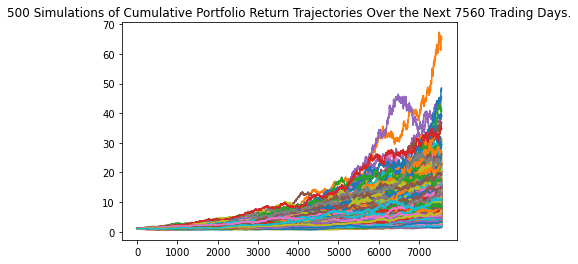

In [19]:
# Plot simulation outcomes
line_plot = MC_thirtyyears.plot_simulation()

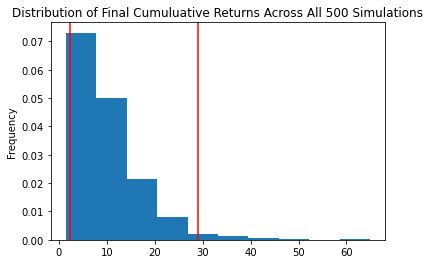

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyears.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
stat_summary = MC_thirtyyears.summarize_cumulative_return()

# Print summary statistics
print(stat_summary)

count           500.000000
mean             10.303300
std               7.365355
min               1.417518
25%               5.458661
50%               8.221980
75%              13.307299
max              64.946583
95% CI Lower      2.303399
95% CI Upper     29.073757
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(stat_summary[8]*initial_investment,2)
ci_upper = round(stat_summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $46067.97 and $581475.14


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(stat_summary[8]*initial_investment,2)
ci_upper = round(stat_summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $69101.96 and $872212.7


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyears = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252*5
)
MC_fiveyears.portfolio_data

AGG                                      \
                             open      high     low    close   volume   
2015-10-23 00:00:00-04:00  109.79  109.7900  109.69  109.740  1344632   
2015-10-26 00:00:00-04:00  109.85  109.9000  109.74  109.790  1385981   
2015-10-27 00:00:00-04:00  110.03  110.0300  109.88  109.950  1791888   
2015-10-28 00:00:00-04:00  109.98  110.0500  109.57  109.630  1474796   
2015-10-29 00:00:00-04:00  109.34  109.4200  109.13  109.160  2095003   
...                           ...       ...     ...      ...      ...   
2020-10-19 00:00:00-04:00  117.81  117.8700  117.72  117.787  4231106   
2020-10-20 00:00:00-04:00  117.70  117.7100  117.58  117.640  3624855   
2020-10-21 00:00:00-04:00  117.59  117.6400  117.48  117.515  2829309   
2020-10-22 00:00:00-04:00  117.51  117.5400  117.30  117.310  3933253   
2020-10-23 00:00:00-04:00  117.30  117.4599  117.30  117.450  1961947   

                                           SPY                            \
                          daily_return    open    high      low    close   
2015-10-23 00:00:00-04:00          NaN  207.25  207.95  206.300  207.510   
2015-10-26 00:00:00-04:00     0.000456  207.30  207.37  206.560  206.970   
2015-10-27 00:00:00-04:00     0.001457  206.20  207.00  205.790  206.580   
2015-10-28 00:00:00-04:00    -0.002910  206.97  208.97  206.210  208.960   
2015-10-29 00:00:00-04:00    -0.004287  208.34  209.27  208.210  208.870   
...                                ...     ...     ...      ...      ...   
2020-10-19 00:00:00-04:00    -0.000789  348.62  349.33  341.040  342.020   
2020-10-20 00:00:00-04:00    -0.001248  343.46  346.88  342.640  343.340   
2020-10-21 00:00:00-04:00    -0.001063  343.33  345.67  342.450  342.690   
2020-10-22 00:00:00-04:00    -0.001744  342.96  345.24  340.650  344.630   
2020-10-23 00:00:00-04:00     0.001193  345.93  345.99  343.605  344.266   

                                                   
                              volume daily_return  
2015-10-23 00:00:00-04:00  103135843          NaN  
2015-10-26 00:00:00-04:00   51484043    -0.002602  
2015-10-27 00:00:00-04:00   62899344    -0.001884  
2015-10-28 00:00:00-04:00  115482088     0.011521  
2015-10-29 00:00:00-04:00   64052955    -0.000431  
...                              ...          ...  
2020-10-19 00:00:00-04:00   54462156    -0.015061  
2020-10-20 00:00:00-04:00   48206853     0.003859  
2020-10-21 00:00:00-04:00   43419032    -0.001893  
2020-10-22 00:00:00-04:00   45033179     0.005661  
2020-10-23 00:00:00-04:00   16984828    -0.001056  

[1260 rows x 12 columns]

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyears.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996266,1.011201,0.998247,1.007652,0.994882,1.005826,0.995404,0.998657,0.996769,1.004081,...,0.999415,1.001067,0.993756,0.998901,1.000711,0.994870,1.003380,1.003618,0.993525,0.997806
2,0.983318,1.004143,1.002205,1.017287,0.990497,1.004663,0.996572,1.013775,1.004921,1.003733,...,0.999760,0.993250,0.990597,1.006921,0.997311,0.986958,1.003217,1.003880,0.989246,1.003551
3,0.988771,1.002722,0.989441,1.023189,1.004016,1.018326,1.005087,1.011431,1.001000,1.011383,...,0.994575,0.984938,0.993713,1.001697,0.999412,1.001827,1.005523,0.992980,0.989849,1.004927
4,0.983228,0.997800,0.995832,1.020485,1.000730,1.016551,1.010488,1.015068,1.003487,1.025143,...,0.989880,0.985735,0.993245,0.997013,0.996897,1.005012,1.002847,0.998197,1.004214,0.997409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.255464,1.375002,1.293546,1.915567,0.853410,1.826747,1.567424,1.376243,1.832871,1.641740,...,0.939617,1.264211,0.996432,1.126496,1.266740,1.127347,1.562532,1.341078,1.125629,1.501091
1257,1.259009,1.368057,1.287586,1.912163,0.862660,1.831141,1.581289,1.396885,1.852151,1.646323,...,0.932464,1.269064,0.999386,1.123188,1.252032,1.112140,1.567498,1.342110,1.123290,1.482325
1258,1.276123,1.343416,1.296952,1.902906,0.865553,1.856919,1.578513,1.388439,1.858274,1.646971,...,0.936793,1.258014,1.002376,1.133263,1.254984,1.110524,1.575026,1.341962,1.123822,1.474964
1259,1.290975,1.351950,1.296955,1.890688,0.875986,1.841669,1.578771,1.363993,1.846252,1.648610,...,0.941690,1.252234,1.004301,1.136046,1.265769,1.109923,1.568398,1.356752,1.119144,1.489744


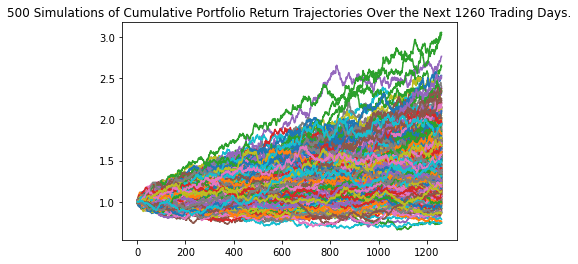

In [26]:
# Plot simulation outcomes
MC_fiveyears.plot_simulation()

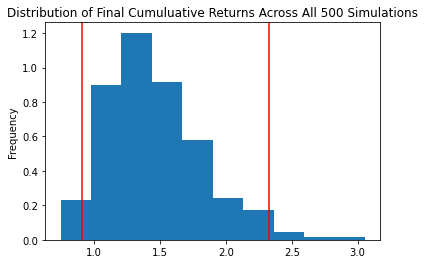

In [27]:
# Plot probability distribution and confidence intervals
MC_fiveyears.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
fiveyears_stat_summary = MC_fiveyears.summarize_cumulative_return()

# Print summary statistics
print(fiveyears_stat_summary )

count           500.000000
mean              1.454422
std               0.364065
min               0.742852
25%               1.191036
50%               1.389149
75%               1.655590
max               3.055149
95% CI Lower      0.905732
95% CI Upper      2.328712
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment = 100000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(fiveyears_stat_summary[8]*initial_investment,2)
ci_upper_five = round(fiveyears_stat_summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $100000 in the portfolio over the next 5 years will end within in the range of $90573.18 and $232871.15


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyears = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252*10
)


In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyears.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996790,0.994576,1.009484,1.010988,0.990151,1.008249,1.006382,1.005034,1.006427,0.994143,...,0.992114,1.001892,0.999134,1.000450,0.992827,1.002120,1.002443,1.005133,1.000403,0.997507
2,1.000108,0.999596,1.007310,1.005276,0.990462,1.001098,0.993501,1.012075,1.019845,0.997792,...,0.992552,0.999285,0.992211,1.006032,0.984785,1.009229,1.012722,1.006361,0.997080,0.994212
3,1.014648,1.010233,1.012531,1.007208,1.001125,0.990013,0.991846,1.016783,1.027906,0.992273,...,0.990386,1.002191,0.993176,1.010077,0.971345,1.016118,1.011807,1.001316,1.000212,0.990248
4,1.018398,1.012098,1.026868,1.007655,0.994212,0.991818,0.989411,1.004632,1.025607,0.997381,...,0.985445,1.011766,0.984929,1.016535,0.968995,1.022103,1.017913,0.994836,0.984889,0.989717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.158617,3.266890,3.395119,2.470587,1.323975,2.832967,2.093834,2.489990,1.840745,2.095296,...,1.344507,2.590988,1.010459,2.017958,1.679347,4.535868,1.732137,2.524094,1.998644,1.520303
2517,1.160523,3.240837,3.410728,2.460980,1.332108,2.776640,2.089429,2.477400,1.816377,2.111220,...,1.340994,2.588057,1.006091,2.009986,1.674498,4.565711,1.712205,2.507016,2.012580,1.511842
2518,1.150111,3.170613,3.416056,2.478853,1.335112,2.777156,2.092788,2.469609,1.802059,2.103863,...,1.348111,2.586210,1.001797,1.999487,1.658461,4.553668,1.711551,2.475548,1.982361,1.507899
2519,1.161565,3.183874,3.397210,2.489418,1.344123,2.777107,2.096530,2.474448,1.809869,2.090284,...,1.349734,2.612128,0.998934,1.983696,1.660540,4.593988,1.728986,2.459748,1.972850,1.498003


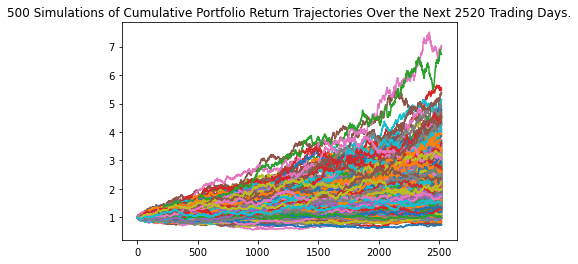

In [32]:
# Plot simulation outcomes
MC_tenyears.plot_simulation()

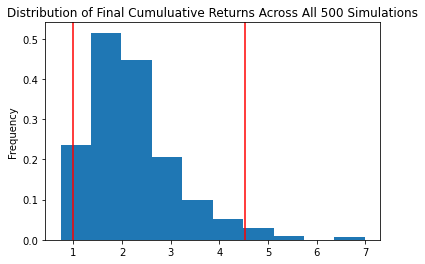

In [33]:
# Plot probability distribution and confidence intervals
MC_tenyears.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
tenyears_stat_summary = MC_tenyears.summarize_cumulative_return()

# Print summary statistics
print(tenyears_stat_summary)

count           500.000000
mean              2.210591
std               0.901364
min               0.735631
25%               1.597181
50%               2.051679
75%               2.608220
max               6.988047
95% CI Lower      0.987146
95% CI Upper      4.515455
Name: 2520, dtype: float64


In [35]:
# Set initial investment
initial_investment = 50000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tenyears_stat_summary[8]*initial_investment,2)
ci_upper_ten = round(tenyears_stat_summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $50000 in the portfolio over the next 10 years will end within in the range of $49357.31 and $225772.75
